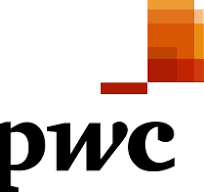

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

PwC has tasked your team with conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

## **📈 Phase 1: Understanding the Customer Base**
### **Objective:** Summarize key customer insights

### **1. Churn Percentage**  
- What percentage of customers are leaving?  

### **2. Customer Segments**  
- Analyze customer demographics (Age, Gender, Tenure).  

### **3. Services Used**  
- Do churned customers have **Internet, Phone, or TV services**?  

### **4. Billing & Payment Methods**  
- Do churned customers prefer **paperless billing, credit cards, or bank transfers**?  

### **5. Contract Types**  
- Are **monthly contract customers** churning more than **annual contract customers**?  

---

## **🤖 Phase 2: Predicting Customer Churn**
### **Objective:** Build a churn prediction model to identify at-risk customers.

### **1. Feature Selection**
Identify key factors influencing churn, such as tenure, contract type, payment method, and monthly charges.

### **2. Model Training**
Train a classification model (Logistic Regression, Decision Tree, or XGBoost) to predict churn.

### **3. Performance Evaluation**
Assess model accuracy, precision, recall, F1-score, and AUC-ROC to measure effectiveness.

### **4. Key Insights & Recommendations**
Analyze feature importance, identify top churn drivers, and provide data-driven retention strategies.


# 1. Import the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DATA ANALYST CLASS/02 Churn-Dataset.xlsx')

# 2. Data preparation & Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0,0,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,0,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,0,0,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,0


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

# 3. Exploratory Data Analysis

# 1. FINDING CHURN RATE :

In [ ]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
overall_churn_rate = data['Churn'].mean() * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.54%


In [ ]:
data["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


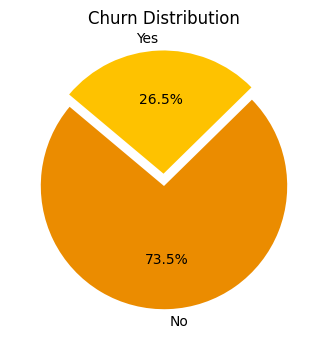

In [ ]:
# Get churn counts
churn_counts = data['Churn'].value_counts()

# Define your mapping
churn_labels = {0: 'No', 1: 'Yes'}

# Define explode (still exploding the "Yes" slice)
explode = (0, 0.1)

# Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ['No', 'Yes']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#eb8c00', '#fec200'],
        explode=explode)
plt.title('Churn Distribution')
plt.show()

# 2. FINDING NUMERICAL DATA USING DESCRIBE FUNCTION AND BOX PLOTS**

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566,0.265370
std,0.368612,24.559481,30.090047,1.275299,1.250117,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000,1.000000


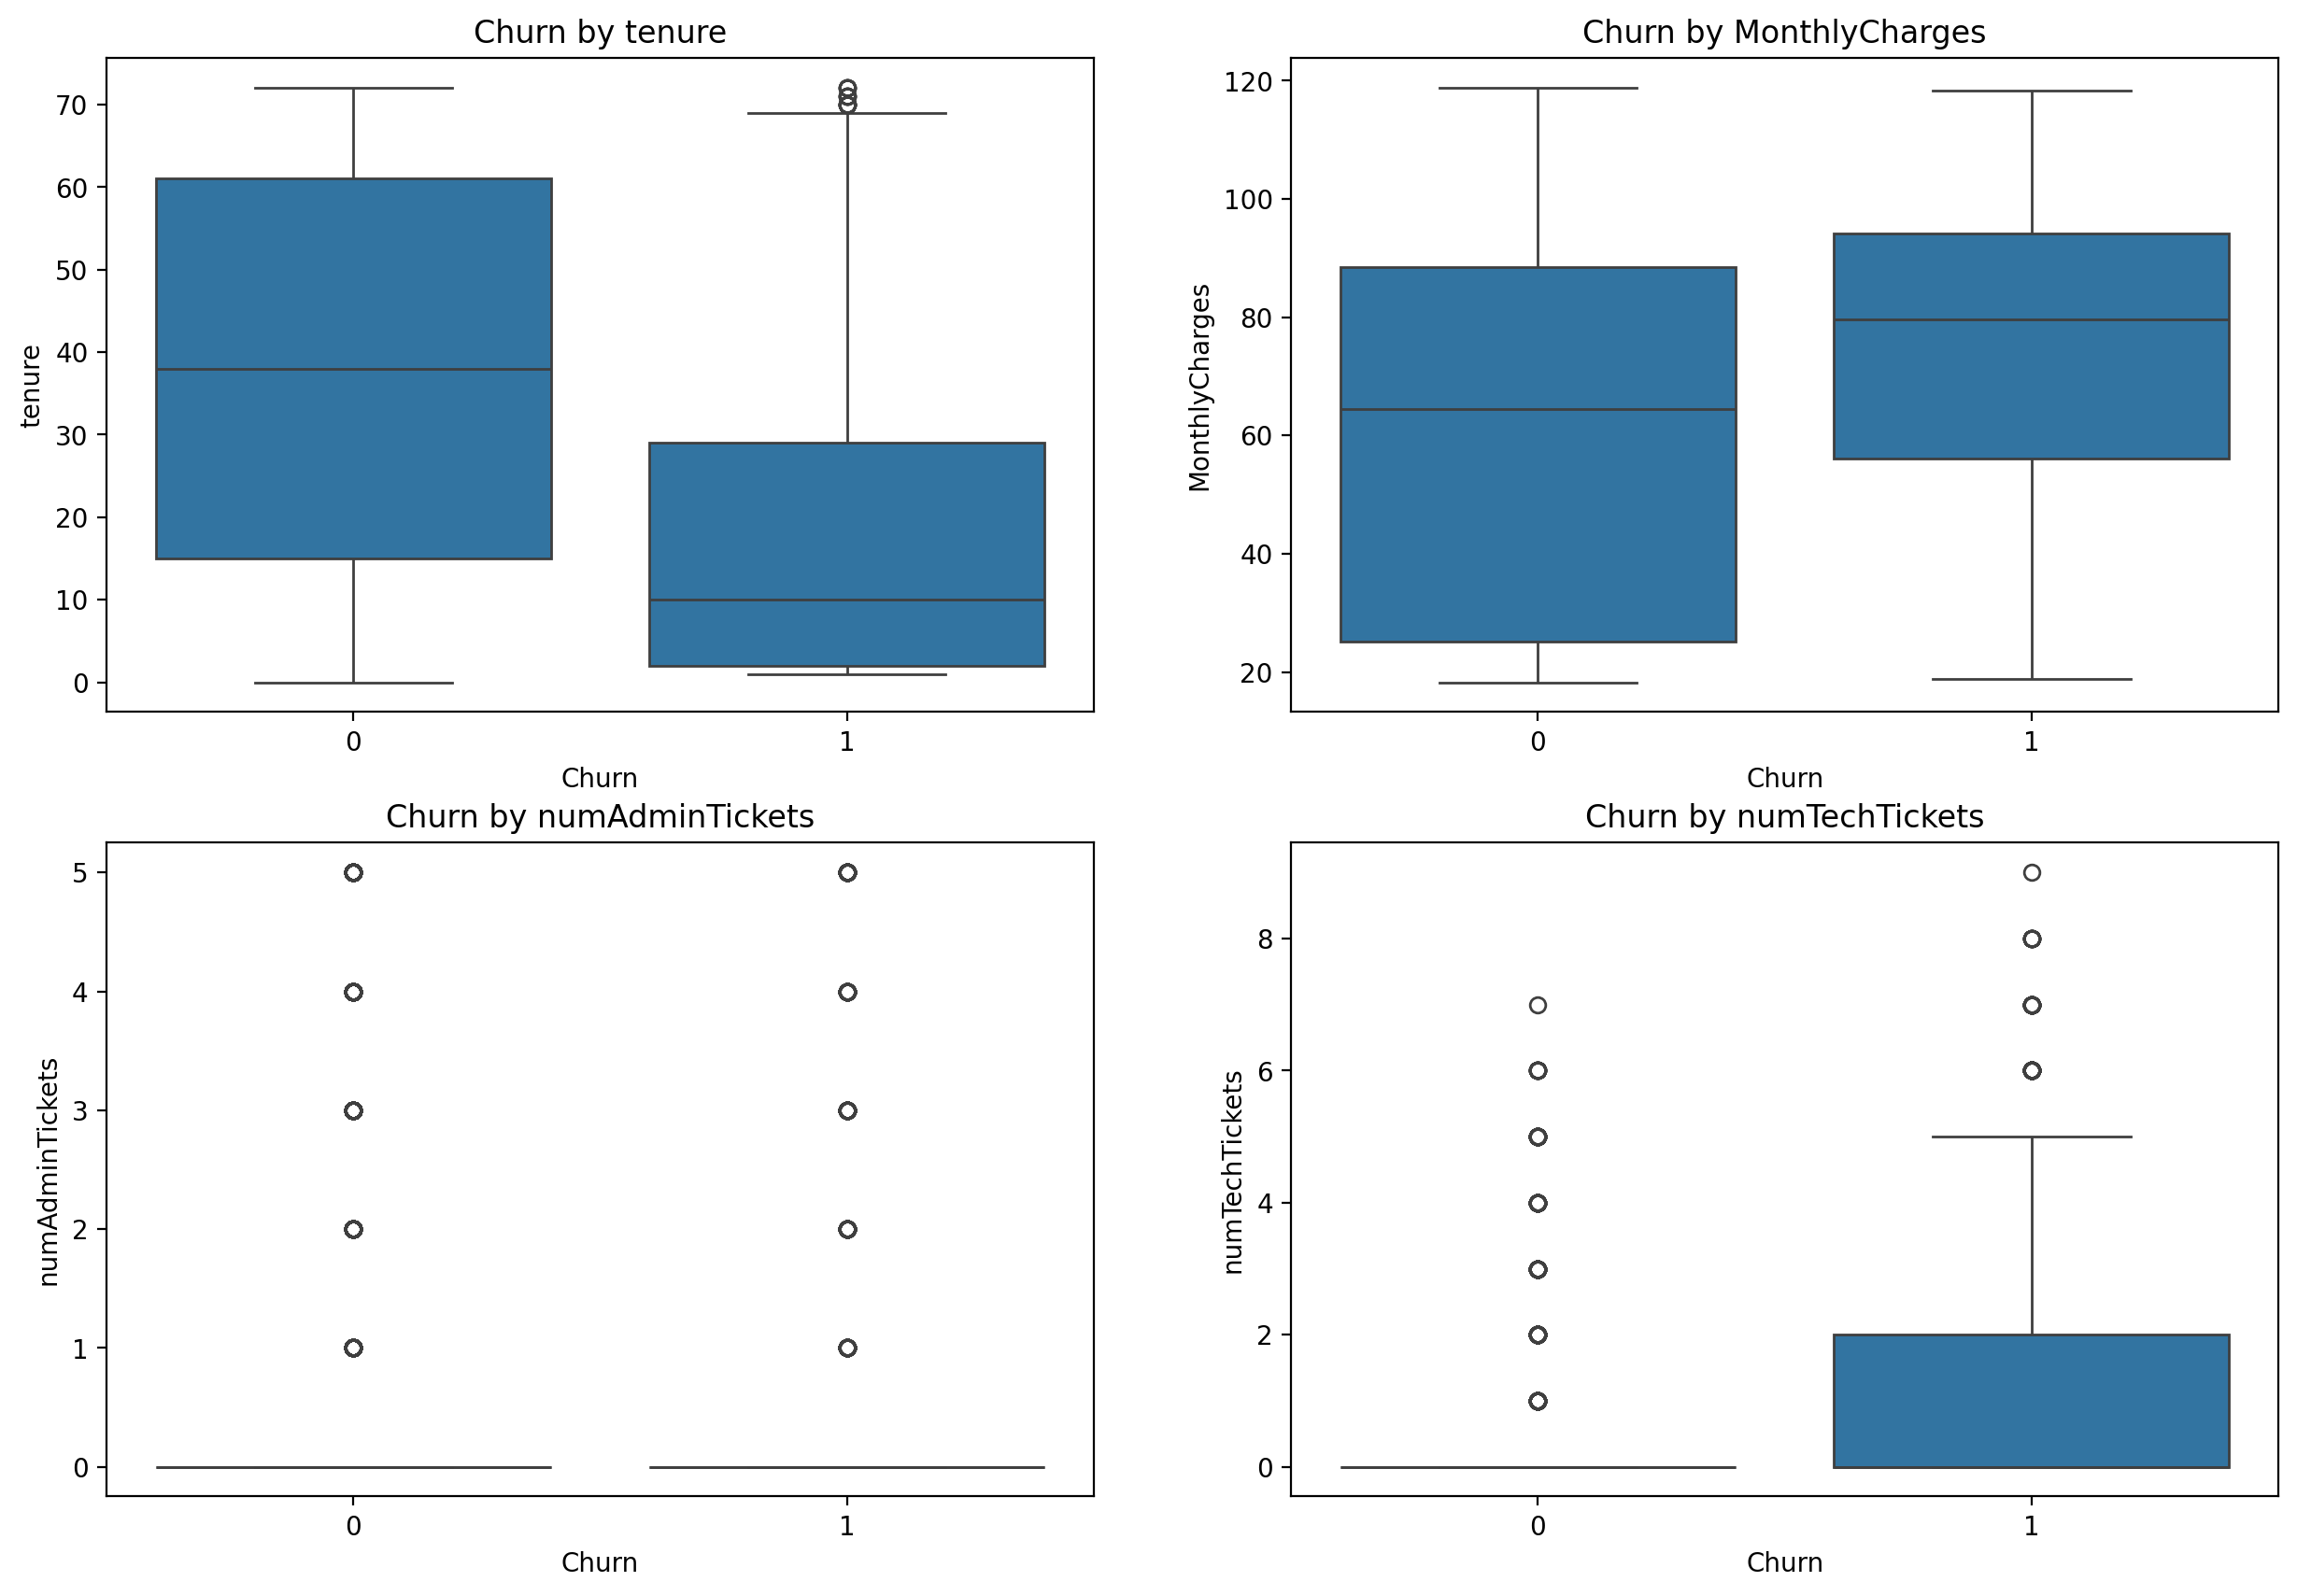

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets']
plt.figure(figsize=(15, 10),dpi=200)

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=column, data=data)
    plt.title(f'Churn by {column}')


plt.show()

# 3.TENURE CHURN RATE ANALYSIS BY BAR CHARTS

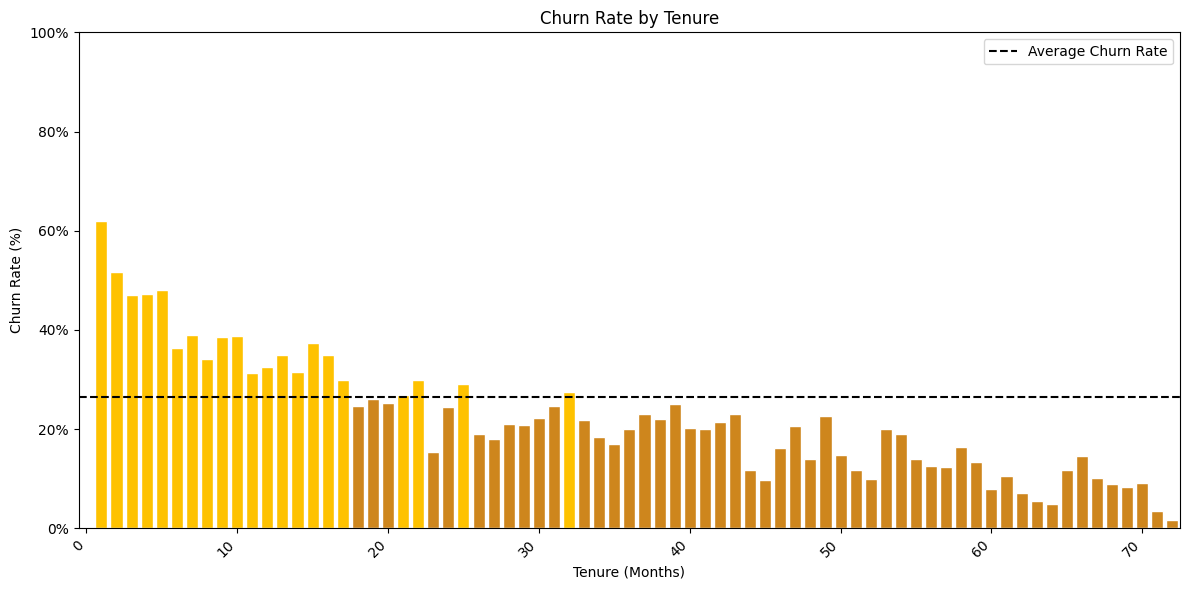

In [ ]:
# Calculate churn rate for each tenure value
tenure_churn_rate = data.groupby('tenure')['Churn'].mean().reset_index(name='churn_rate')

# Plotting the churn rate by tenure using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility

# Creating the bar plot with specified color
sns.barplot(x='tenure', y='churn_rate', data=tenure_churn_rate, color='#EB8C00',edgecolor="white", linewidth=1)

# Setting the title and labels
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')

# Customizing x-axis ticks and labels with rotation
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70]  # Desired tick positions
plt.xticks(x_ticks, x_ticks, rotation=45, ha='right')  # Set ticks, rotate labels, and align

# Setting y-axis limits and formatting as percentage
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Adding average churn rate line
avg_churn_rate = data['Churn'].mean()
plt.axhline(y=avg_churn_rate, color='black', linestyle='--', label='Average Churn Rate')

# Get the current axes (ax)
ax = plt.gca()

for bar in ax.patches:  # ax is the barplot axes object from the barplot
    if bar.get_height() > avg_churn_rate:
        bar.set_facecolor('#fec200') #change the color with the set_facecolor

# Displaying the legend and adjusting layout
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-18-6b9d738d52ed>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_rate = data.groupby('tenure_group')['Churn'].mean().reset_index(name='churn_rate')


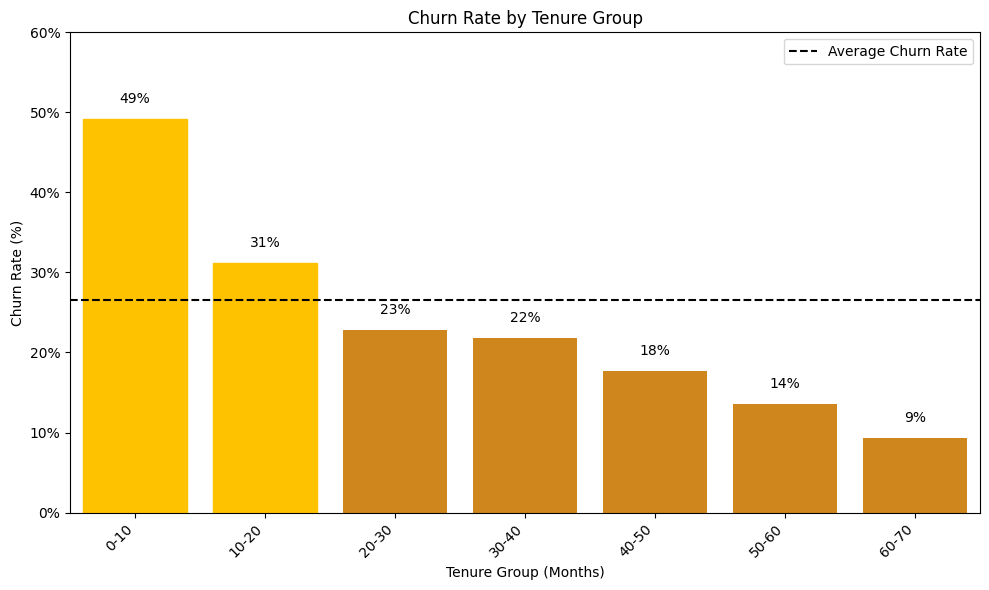

In [ ]:
# Create tenure groups
data['tenure_group'] = pd.cut(data['tenure'],
                               bins=[0, 10, 20, 30, 40, 50, 60, 70],
                               labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70'],
                               include_lowest=True)

# Calculate churn rate for each tenure group
tenure_churn_rate = data.groupby('tenure_group')['Churn'].mean().reset_index(name='churn_rate')

# Plotting the churn rate by tenure group using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='tenure_group', y='churn_rate', data=tenure_churn_rate, color='#EB8C00')

# 1. Average churn rate line
avg_churn_rate = data['Churn'].mean()
plt.axhline(y=avg_churn_rate, color='black', linestyle='--', label='Average Churn Rate')

# 2. Limit churn rate axis to 60% (and format as percentage)
plt.ylim(0, 0.6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# 3. Rotate tenure labels
plt.xticks(rotation=45, ha='right')

# 4. Show percentage for each bar on top
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02,
            '{:.0%}'.format(height), ha="center")

# 5. Highlight bars bigger than average churn rate
for p in ax.patches:
    if p.get_height() > avg_churn_rate:
        p.set_color('#FEC201')

plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# 4. MONTHLY CHARGED ANALYSIS

<ipython-input-19-1249dd7f02cc>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_charge_churn_rate = data.groupby('monthly_charge_group')['Churn'].mean().reset_index(name='churn_rate')


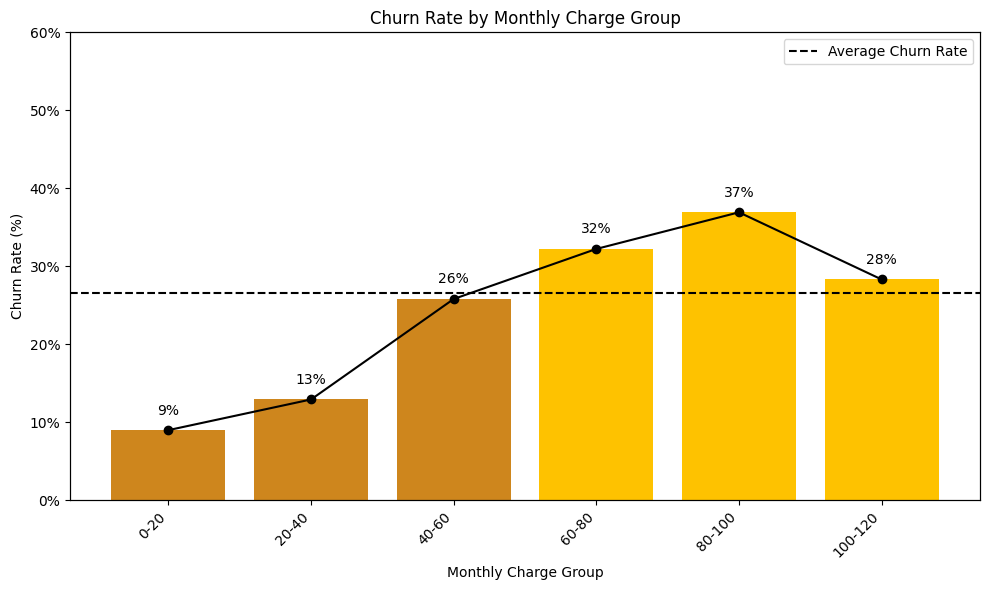

In [ ]:
# Create monthly charge groups (bins of 15)
data['monthly_charge_group'] = pd.cut(data['MonthlyCharges'],
                                       bins=np.arange(0, 121, 20),
                                       labels=[f'{i}-{i+20}' for i in np.arange(0, 120, 20)],
                                       include_lowest=True,
                                       right=False)

# Calculate churn rate for each monthly charge group
monthly_charge_churn_rate = data.groupby('monthly_charge_group')['Churn'].mean().reset_index(name='churn_rate')

ig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='monthly_charge_group', y='churn_rate', data=monthly_charge_churn_rate, color='#EB8C00', ax=ax1)

# 1. Average churn rate line
avg_churn_rate = data['Churn'].mean()
ax1.axhline(y=avg_churn_rate, color='black', linestyle='--', label='Average Churn Rate')

# 2. Limit churn rate axis to 60% (and format as percentage)
ax1.set_ylim(0, 0.6)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# 3. Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# 4. Show percentage for each bar on top
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.02,
            '{:.0%}'.format(height), ha="center")

# 5. Highlight bars bigger than average churn rate
for p in ax1.patches:
    if p.get_height() > avg_churn_rate:
        p.set_facecolor('#FEC200')
# Create a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.plot(monthly_charge_churn_rate['monthly_charge_group'], monthly_charge_churn_rate['churn_rate'], color='black', marker='o', linestyle='-')
ax2.set_ylim(0, 0.6)  # Align y-axis limits with the bar plot
ax2.get_yaxis().set_visible(False)  # Hide the y-axis of the line plot

# Move average churn rate label to the right
ax1.legend(loc='upper right')

plt.title('Churn Rate by Monthly Charge Group')
ax1.set_xlabel('Monthly Charge Group')
ax1.set_ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()

# 4. Churn Analysis (Customer demographic analysis)

# 1.GENDER ANALYSIS

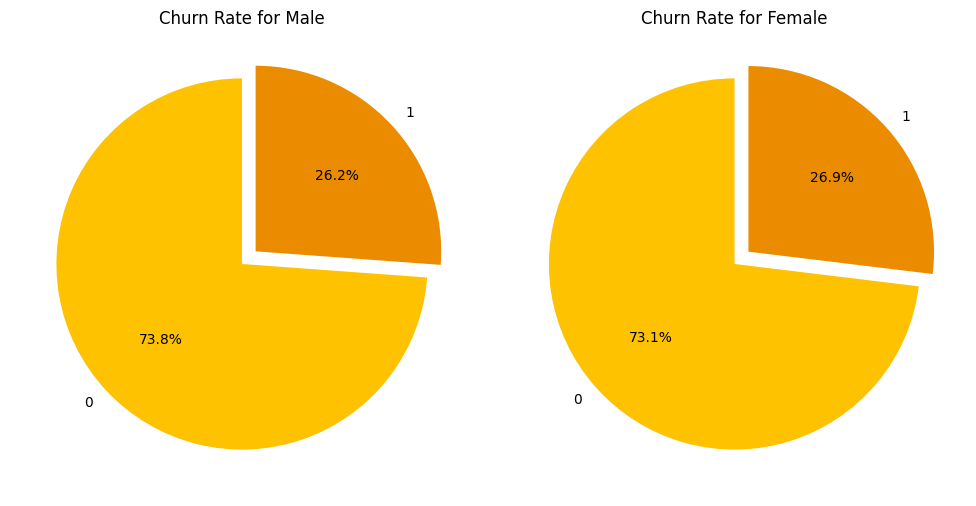

In [ ]:
# Calculate churn rates for male and female
churn_by_gender = data.groupby(['gender', 'Churn'])['Churn'].count()
churn_rate_by_gender = churn_by_gender / data.groupby('gender')['Churn'].count() * 100

# Extract data for pie charts
male_churn_rate = churn_rate_by_gender.loc['Male']
female_churn_rate = churn_rate_by_gender.loc['Female']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Pie chart for Male
explode_has_dependents = (0, 0.1)
axes[0].pie(male_churn_rate, labels=male_churn_rate.index, autopct='%1.1f%%', startangle=90, colors=['#FEC200', '#EB8C00'],explode=explode_has_dependents)
axes[0].set_title('Churn Rate for Male')

# Pie chart for Female
explode_no_dependents = (0, 0.1)
axes[1].pie(female_churn_rate, labels=female_churn_rate.index, autopct='%1.1f%%', startangle=90, colors=['#FEC200', '#EB8C00'],explode=explode_no_dependents)
axes[1].set_title('Churn Rate for Female')

plt.tight_layout()
plt.show()

# OTHER SEGMENTS ANALYSIS ( DEPENDENTS / PARTNER SENIOR CITIZEN)

<ipython-input-14-b4068b4ecba5>:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


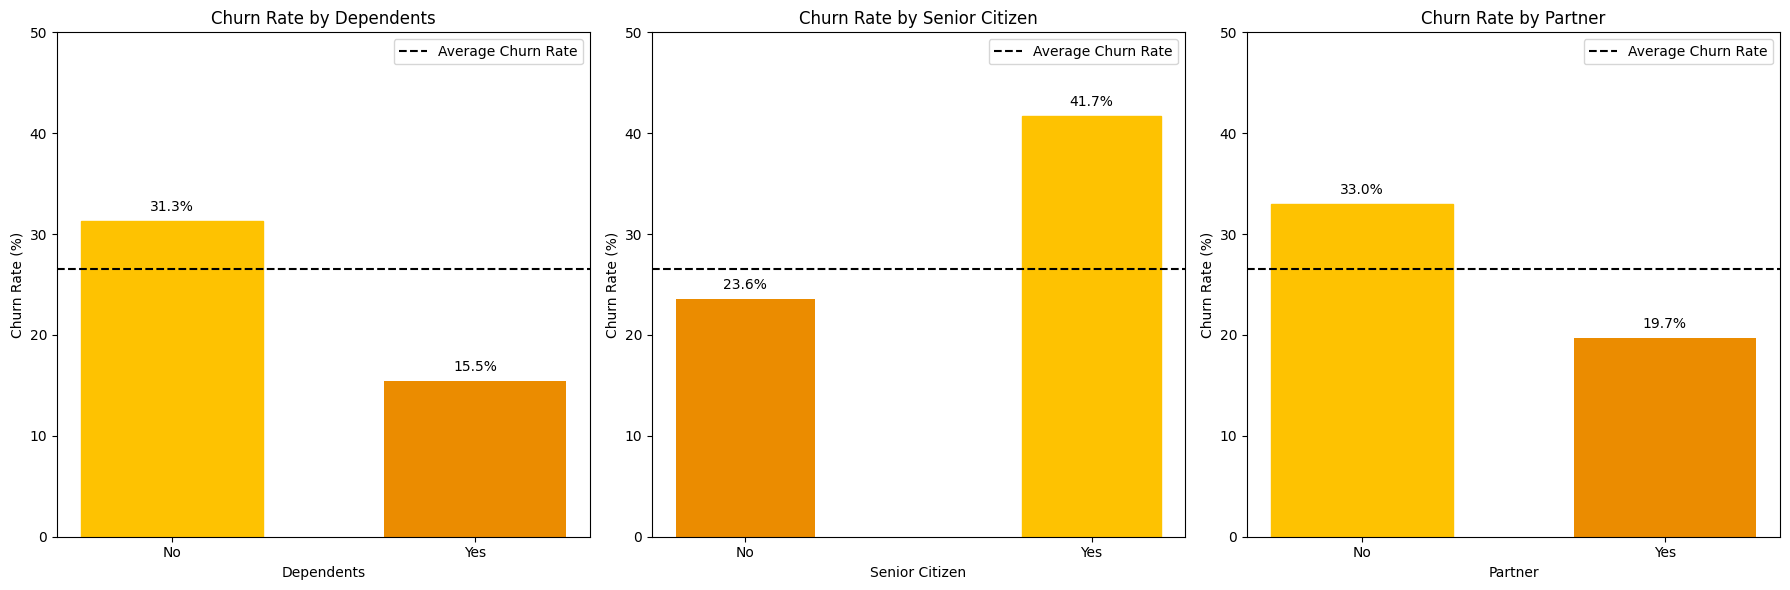

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# --- Plot 1: Churn Rate by Dependents ---
dependents_churn_rate = data.groupby('Dependents')['Churn'].mean() * 100
ax = axes[0]  # Assign the subplot to 'ax' for consistency
ax.bar(dependents_churn_rate.index,
       dependents_churn_rate.values,
       color='#EB8C00',
       width=0.6)
ax.set_title('Churn Rate by Dependents')
ax.set_xlabel('Dependents')
ax.set_ylabel('Churn Rate (%)')
ax.set_ylim(0, 50)

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.1f}%'.format(height),
            ha="center")

# Calculate and plot the average churn rate line
avg_churn_rate = data['Churn'].mean() * 100
line = ax.axhline(y=avg_churn_rate,
                  color='black',
                  linestyle='--',
                  label='Average Churn Rate')
# Highlight bars bigger than average churn rate
for p in ax.patches:
    if p.get_height() > avg_churn_rate:
        p.set_color('#FEC201')
ax.legend()

# --- Plot 2: Churn Rate by Senior Citizen ---
senior_churn_rate = data.groupby('SeniorCitizen')['Churn'].mean() * 100
ax = axes[1]  # Assign the subplot to 'ax' for consistency
ax.bar(senior_churn_rate.index,
       senior_churn_rate.values,
       color='#EB8C00',
       width=0.4)
ax.set_title('Churn Rate by Senior Citizen')
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Churn Rate (%)')
ax.set_ylim(0, 50)

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.1f}%'.format(height),
            ha="center")
ax.legend()

# Change 0, 1 to No, Yes on x-axis
ax.set_xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Calculate and plot the average churn rate line
avg_churn_rate = data['Churn'].mean() * 100
line = ax.axhline(y=avg_churn_rate,
                  color='black',
                  linestyle='--',
                  label='Average Churn Rate')
# Highlight bars bigger than average churn rate
for p in ax.patches:
    if p.get_height() > avg_churn_rate:
        p.set_color('#FEC201')
ax.legend()

# --- Plot 3: Churn Rate by Partner ---
partner_churn_rate = data.groupby('Partner')['Churn'].mean() * 100
ax = axes[2]  # Assign the subplot to 'ax' for consistency
ax.bar(partner_churn_rate.index,
       partner_churn_rate.values,
       color='#EB8C00',
       width=0.6)
ax.set_title('Churn Rate by Partner')
ax.set_xlabel('Partner')
ax.set_ylabel('Churn Rate (%)')
ax.set_ylim(0, 50)

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.1f}%'.format(height),
            ha="center")

# Calculate and plot the average churn rate line
avg_churn_rate = data['Churn'].mean() * 100
line = ax.axhline(y=avg_churn_rate,
                  color='black',
                  linestyle='--',
                  label='Average Churn Rate')
# Highlight bars bigger than average churn rate
for p in ax.patches:
    if p.get_height() > avg_churn_rate:
        p.set_color('#FEC201')
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# 2. SERVICE USING IN COMPANY ANALYSIS

<ipython-input-15-6db482059c97>:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0, ha='center')


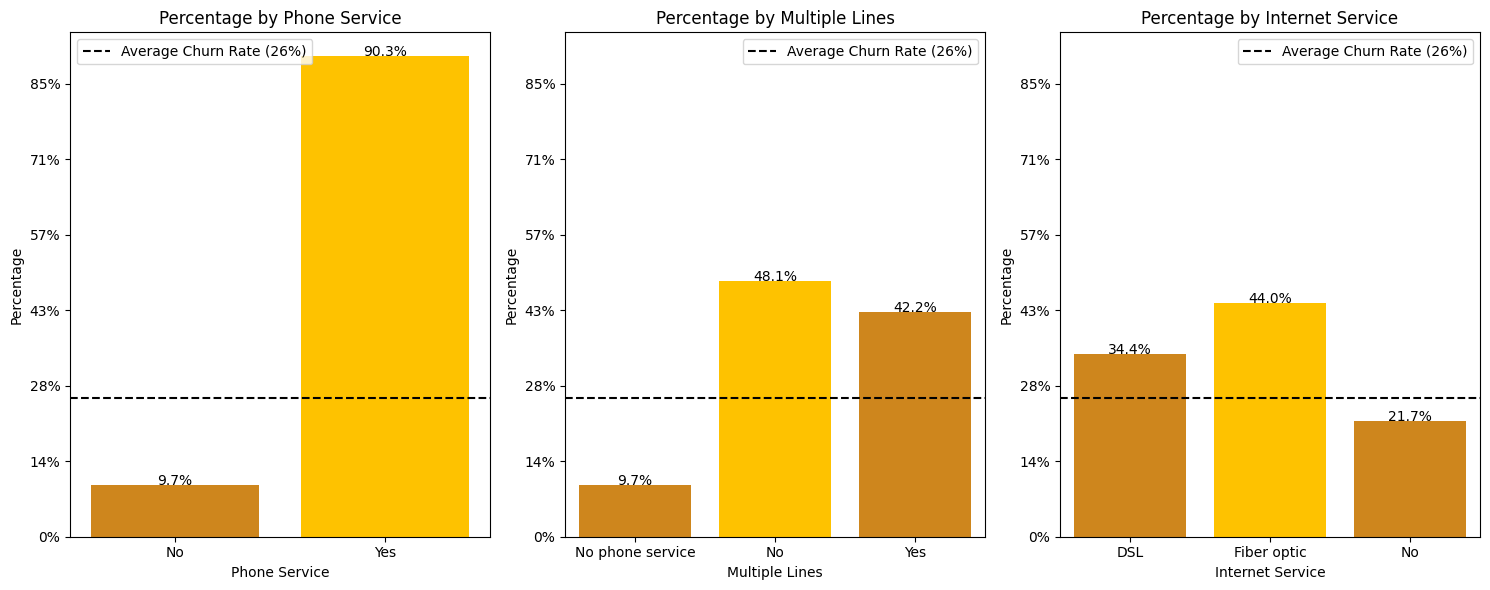

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  # Import for percentage formatting

plt.figure(figsize=(15, 6))

# --- Subplot 1: Percentage by Phone Service ---
plt.subplot(1, 3, 1)
ax1 = sns.countplot(x='PhoneService', data=data, color='#EB8C00')
plt.title('Percentage by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Percentage')

# Convert y-axis to percentage
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(data)))

# Add percentage labels on top of bars
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 1,
            '{:.1f}%'.format(height/len(data)*100), ha="center")

# Highlight the highest bar
heights = [p.get_height() for p in ax1.patches]  # Get heights of all bars
max_height_index = heights.index(max(heights))  # Find index of the highest bar
ax1.patches[max_height_index].set_facecolor('#fec200')  # Set color of the highest bar

# Add average churn rate line (at 26%)
avg_churn_rate = len(data) * 0.26  # Calculate 26% of total data points
ax1.axhline(y=avg_churn_rate, color='black', linestyle='--', label='Average Churn Rate (26%)')
ax1.legend()

# --- Subplot 2: Percentage by Multiple Lines ---
plt.subplot(1, 3, 2)
ax2 = sns.countplot(x='MultipleLines', data=data, color='#Eb8c00')
plt.title('Percentage by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Percentage')

# Convert y-axis to percentage
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(data)))

# Add percentage labels on top of bars
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 1,
            '{:.1f}%'.format(height/len(data)*100), ha="center")

# Highlight the highest bar
heights = [p.get_height() for p in ax2.patches]  # Get heights of all bars
max_height_index = heights.index(max(heights))  # Find index of the highest bar
ax2.patches[max_height_index].set_facecolor('#fec200')  # Set color of the highest bar

# Add average churn rate line (at 26%)
ax2.axhline(y=avg_churn_rate, color='black', linestyle='--', label='Average Churn Rate (26%)')
ax2.legend()

# --- Subplot 3: Percentage by Internet Service ---
plt.subplot(1, 3, 3)
ax3 = sns.countplot(x='InternetService', data=data, color='#eb8c00')
plt.title('Percentage by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Percentage')

# Convert y-axis to percentage
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(data)))

# Add percentage labels on top of bars
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 1,
            '{:.1f}%'.format(height/len(data)*100), ha="center")
# Highlight the highest bar
heights = [p.get_height() for p in ax3.patches]  # Get heights of all bars
max_height_index = heights.index(max(heights))  # Find index of the highest bar
ax3.patches[max_height_index].set_facecolor('#fec200')  # Set color of the highest bar

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0, ha='center')



# Add average churn rate line (at 26%)
ax3.axhline(y=avg_churn_rate, color='black', linestyle='--', label='Average Churn Rate (26%)')
ax3.legend()

# Set similar y-axis limits for all subplots
max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1], ax3.get_ylim()[1])
ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)
ax3.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

# 3. PAPERLESS BILLING ANALYSIS

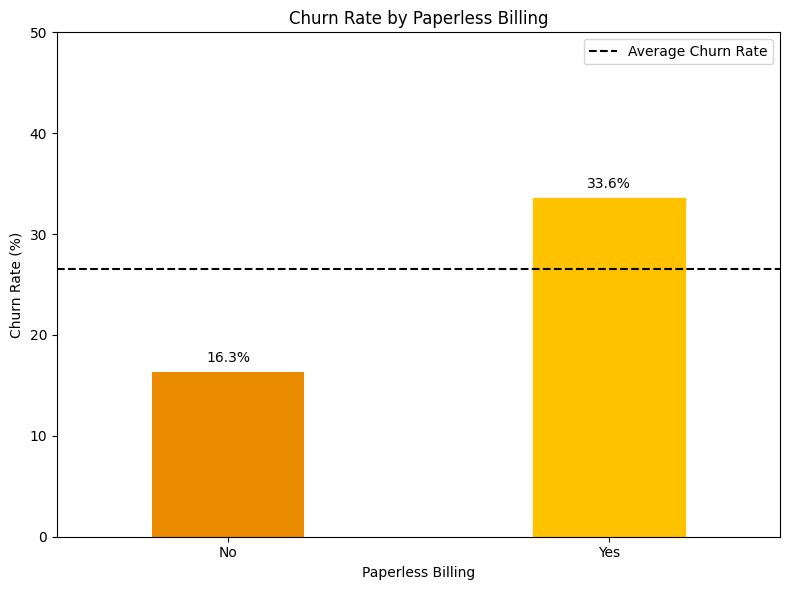

In [ ]:
# Calculate churn rate by PaperlessBilling
paperless_churn_rate = data.groupby('PaperlessBilling')['Churn'].mean() * 100

# Plotting the churn rate by PaperlessBilling
ax = paperless_churn_rate.plot(kind='bar',
                                figsize=(8, 6),
                                color='#EB8C00',  # Orange color for bars
                                width=0.4)

plt.title('Churn Rate by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 50)
plt.yticks(np.arange(0, 51, 10))  # Set y-axis limits to 0-60%

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            '{:.1f}%'.format(height), ha="center")

# Calculate and plot the average churn rate line
avg_churn_rate = data['Churn'].mean() * 100
line = plt.axhline(y=avg_churn_rate, color='black', linestyle='--', label='Average Churn Rate')

# Change 0, 1 to No, Yes on x-axis
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'],rotation=0)  # Assuming 'PaperlessBilling' has values 0 and 1

# 5. Highlight bars bigger than average churn rate
for p in ax.patches:
    if p.get_height() > avg_churn_rate:
        p.set_color('#FEC201')



# Customize legend to show only 'Average Churn Rate'
plt.legend([line], ['Average Churn Rate'])

plt.tight_layout()
plt.show()

# 4. PAYMENT METHOD CHURN RATE ANALYSIS

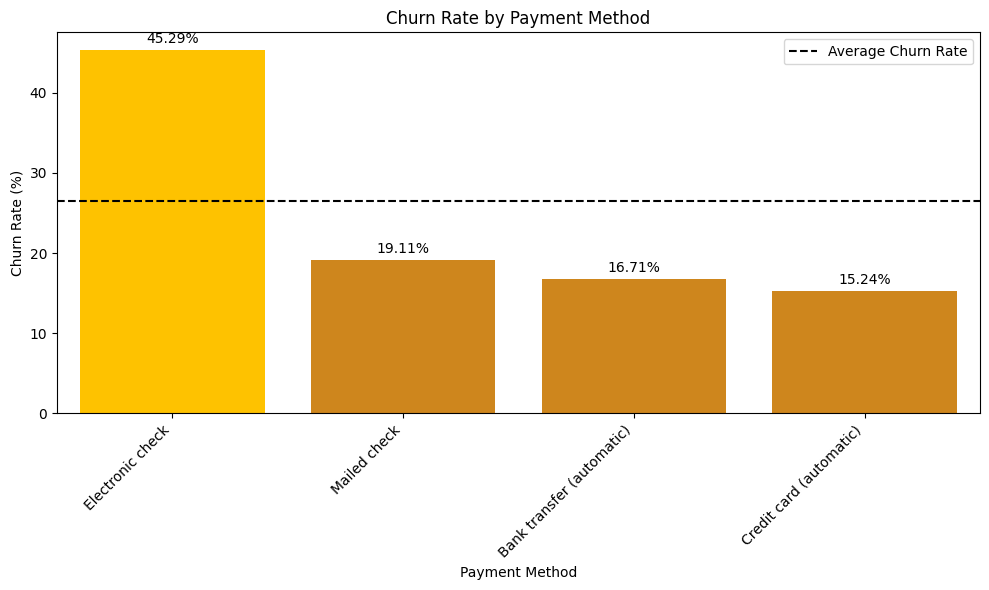

In [ ]:
# Calculate churn rate by payment method
payment_churn = data.groupby('PaymentMethod')['Churn'].agg(['mean', 'count'])
payment_churn['churn_rate'] = payment_churn['mean'] * 100
payment_churn = payment_churn.sort_values('churn_rate', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x=payment_churn.index, y='churn_rate', data=payment_churn,color='#EB8C00' )
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.axhline(y=data['Churn'].mean() * 100, color='black', linestyle='--', label='Average Churn Rate')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height + 0.5,  # Adjust vertical position as needed
            '{:.2f}%'.format(height),
            ha='center',
            va='bottom')
# Highlight the highest bar
heights = [p.get_height() for p in ax.patches]  # Get heights of all bars
max_height_index = heights.index(max(heights))  # Find index of the highest bar
ax.patches[max_height_index].set_facecolor('#fec200')  # Set color of the highest bar



plt.legend()
plt.tight_layout()
plt.show()

## 5.CHURN RATE BY CONTRACT TYPES

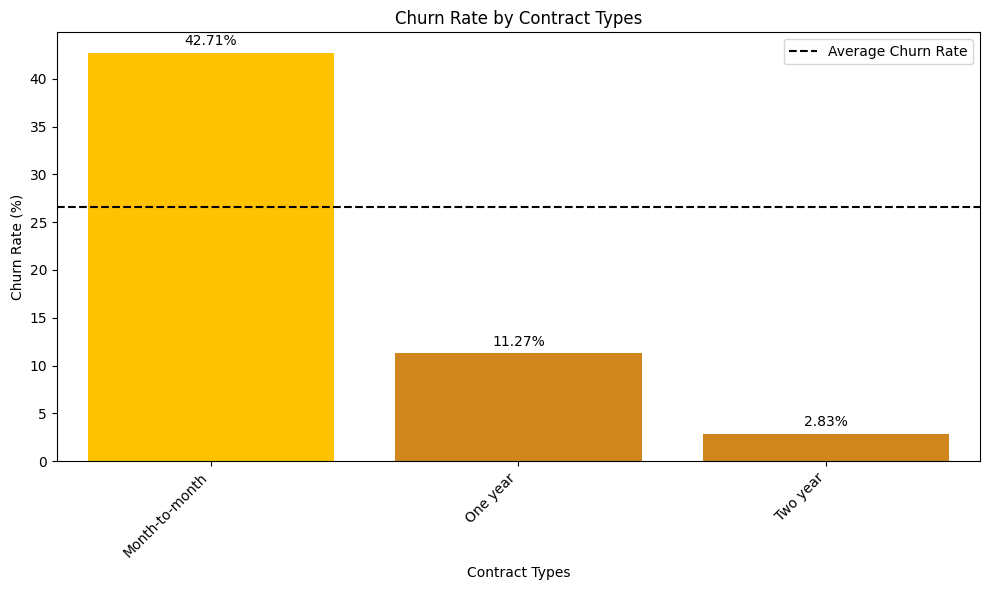

In [ ]:
# Calculate churn rate by payment method
payment_churn = data.groupby('Contract')['Churn'].agg(['mean', 'count'])
payment_churn['churn_rate'] = payment_churn['mean'] * 100
payment_churn = payment_churn.sort_values('churn_rate', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x=payment_churn.index, y='churn_rate', data=payment_churn,color='#EB8C00' )
plt.title('Churn Rate by Contract Types')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.axhline(y=data['Churn'].mean() * 100, color='black', linestyle='--', label='Average Churn Rate')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height + 0.5,  # Adjust vertical position as needed
            '{:.2f}%'.format(height),
            ha='center',
            va='bottom')
# Highlight the highest bar
heights = [p.get_height() for p in ax.patches]  # Get heights of all bars
max_height_index = heights.index(max(heights))  # Find index of the highest bar
ax.patches[max_height_index].set_facecolor('#FEC200')  # Set color of the highest bar

plt.legend()
plt.tight_layout()
plt.show()

# 5. Feature Engineering

# 1. ENCODE CATEGORICAL DATA

In [ ]:
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})

In [ ]:
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})

In [ ]:
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})

In [ ]:
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})

In [ ]:
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [ ]:
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['TechSupport'] = data['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['StreamingTV'] = data['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [ ]:
#cONTRACT
contract_dummies = pd.get_dummies(data['Contract'], prefix='Contract')
#concanate the dummy with original data frames
data = pd.concat([data, contract_dummies], axis=1)
#drop the original contract column
data.drop('Contract', axis=1, inplace=True)
#display few rows to verify
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group,monthly_charge_group,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,29.85,29.85,0,0,0,0-10,20-40,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,56.95,1889.5,0,0,0,30-40,40-60,False,True,False
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,53.85,108.15,0,0,1,0-10,40-60,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,42.30,1840.75,0,3,0,40-50,40-60,False,True,False
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,70.70,151.65,0,0,1,0-10,60-80,True,False,False


In [ ]:
# Payment Method
payment_dummies = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')

# Concatenate dummy variables with the original DataFrame
data = pd.concat([data, payment_dummies], axis=1)

# Drop the original 'PaymentMethod' column
data.drop('PaymentMethod', axis=1, inplace=True)

# Display a few rows to verify the changes
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,tenure_group,monthly_charge_group,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0-10,20-40,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,0,30-40,40-60,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,1,0-10,40-60,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,0,40-50,40-60,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,1,0-10,60-80,True,False,False,False,False,True,False


In [ ]:
# Internet Service
internet_dummies = pd.get_dummies(data['InternetService'], prefix='InternetService')

# Concatenate dummy variables with the original DataFrame
data = pd.concat([data, internet_dummies], axis=1)

# Drop the original 'InternetService' column
data.drop('InternetService', axis=1, inplace=True)

# Display a few rows to verify the changes
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,False,True,False,False,False,False,True,True,False,False
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,True,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,True,False,False,False,False,True,False,False,True,False


## 2. STANDARDIZATION ( MOVE ALL THE NUMERICAL DATA INTO THE SAME STANDARD TYPE)

CHANGE TOTAL CHARGES TO NUMERIC DUE TO IT WAS UPLOADED IN STRING STYPE

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data['TotalCharges'].isna().sum())

11


STANDARDIZE NUMERIC DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols =['tenure','MonthlyCharges','TotalCharges']
#initialize standardscaler
scaler = StandardScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data[numerical_cols].describe())

             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.032000e+03
mean  -2.421273e-17   -6.406285e-17  8.159318e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.990692e-01
25%   -9.516817e-01   -9.725399e-01 -8.302488e-01
50%   -1.372744e-01    1.857327e-01 -3.908151e-01
75%    9.214551e-01    8.338335e-01  6.668271e-01
max    1.613701e+00    1.794352e+00  2.824261e+00


# CORRELATION MATRIX

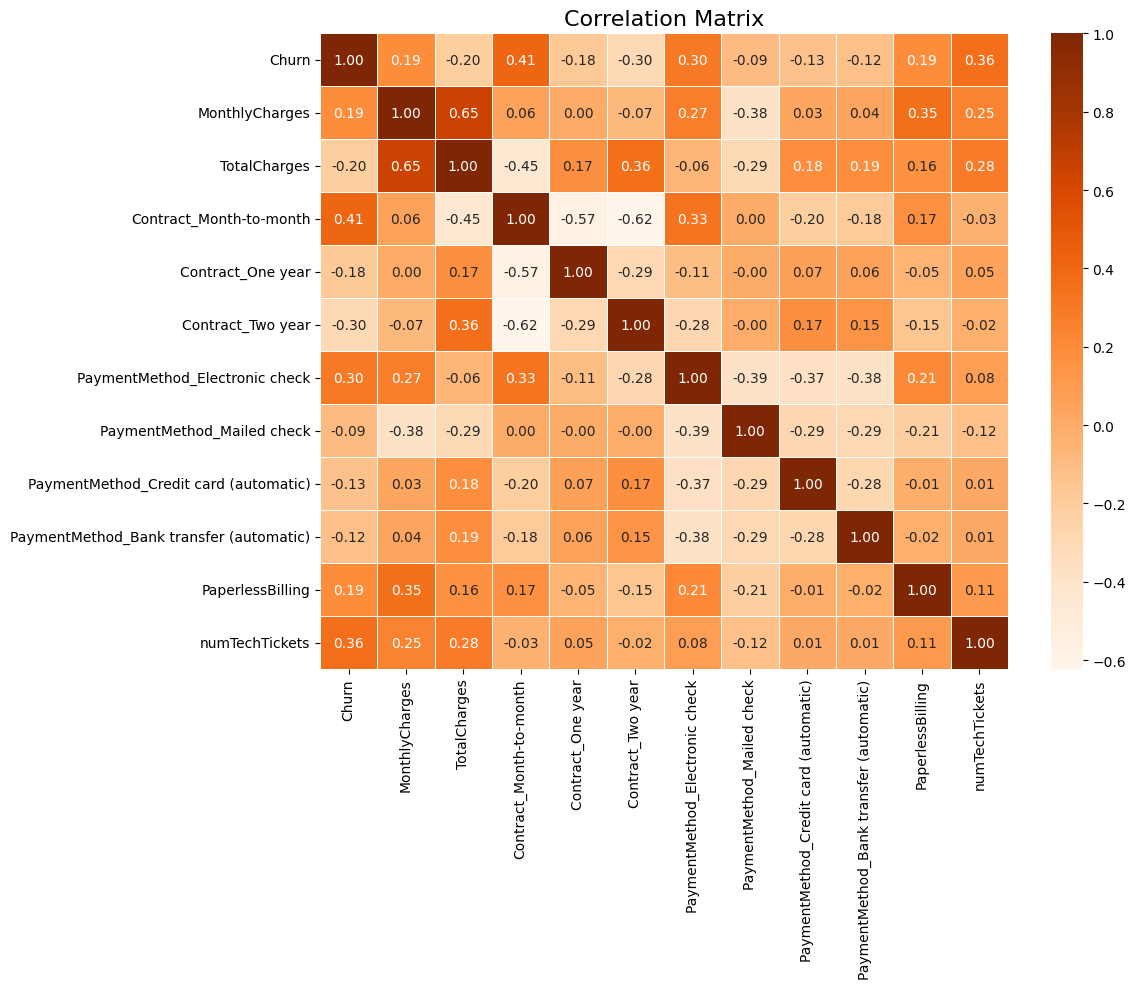

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Drop customerID column
df = data.drop(['customerID'], axis=1)

# Select relevant columns
selected_cols = ['Churn', 'MonthlyCharges', 'TotalCharges',
                 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
                 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)',
                 'PaperlessBilling', 'numTechTickets']
# Filter and one-hot encode categorical variables
df_corr = pd.get_dummies(df[selected_cols], drop_first=True)

# Compute the full correlation matrix
corr_matrix = df_corr.corr()

# Plot full heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()

plt.show()

# 6. Modelling


FILL TOTA CHARGES EMPTY VALUES WITH ITS MEDIAN VALUES

In [ ]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   object  
 1   gender                                   7043 non-null   int64   
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   int64   
 4   Dependents                               7043 non-null   int64   
 5   tenure                                   7043 non-null   float64 
 6   PhoneService                             7043 non-null   int64   
 7   MultipleLines                            7043 non-null   int64   
 8   OnlineSecurity                           7043 non-null   int64   
 9   OnlineBackup                             7043 non-null   int64   
 10  DeviceProtection                    

DROP DUPLICATES IN THE DATA SETS AND NON SENSE COLUMNS

In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
# Drop customerID if it's still in the dataset
data = data.drop(columns=['customerID'])

# LOGISTIC REGRESSION

Confusion Matrix:
[[1427  103]
 [ 179  399]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1530
           1       0.79      0.69      0.74       578

    accuracy                           0.87      2108
   macro avg       0.84      0.81      0.82      2108
weighted avg       0.86      0.87      0.86      2108



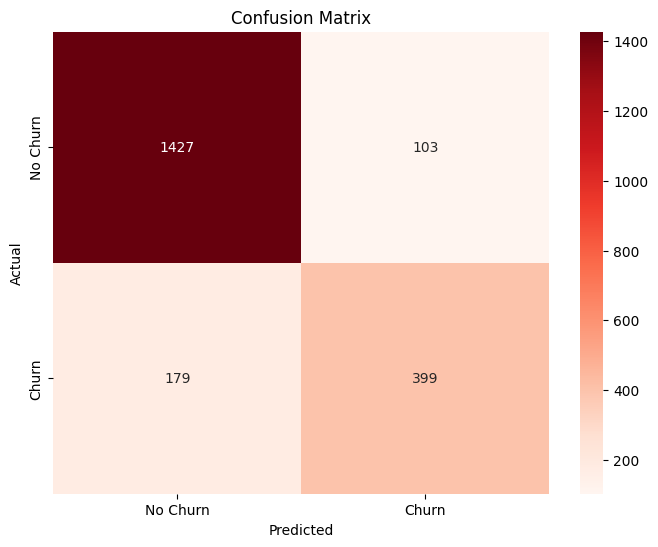

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors


# Define features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[1367  163]
 [ 205  373]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1530
           1       0.70      0.65      0.67       578

    accuracy                           0.83      2108
   macro avg       0.78      0.77      0.78      2108
weighted avg       0.82      0.83      0.82      2108



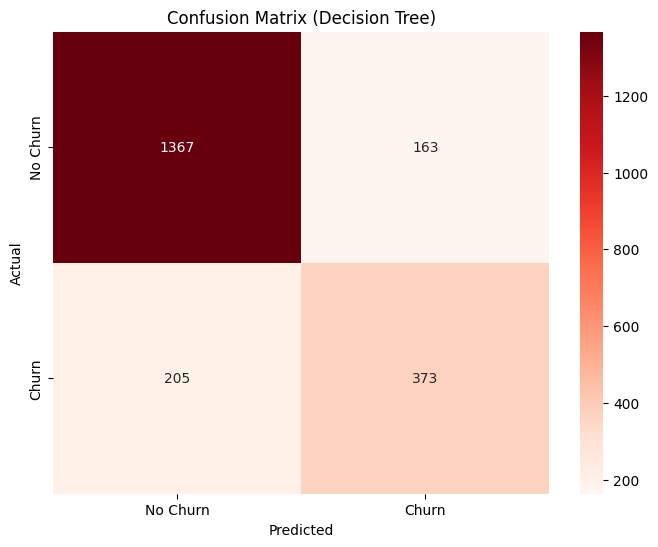

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

# Define features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # Create Decision Tree instance

# Train the model
dt_model.fit(X_train, y_train)  # Train the Decision Tree

# Make predictions
y_pred = dt_model.predict(X_test)  # Predict using Decision Tree

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

Confusion Matrix:
[[1419  111]
 [ 190  388]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1530
           1       0.78      0.67      0.72       578

    accuracy                           0.86      2108
   macro avg       0.83      0.80      0.81      2108
weighted avg       0.85      0.86      0.85      2108



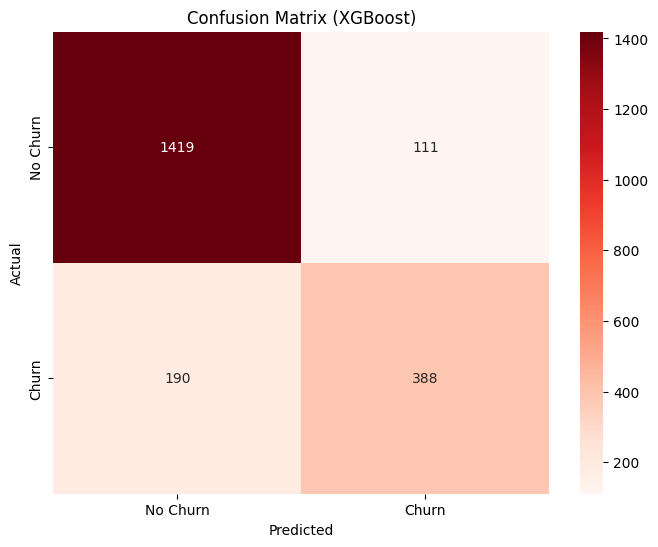

In [ ]:
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ... (assuming cmap_pwc_orange is already defined)

# Define features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']


X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

Confusion Matrix:
[[1441   89]
 [ 208  370]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1530
           1       0.81      0.64      0.71       578

    accuracy                           0.86      2108
   macro avg       0.84      0.79      0.81      2108
weighted avg       0.86      0.86      0.85      2108



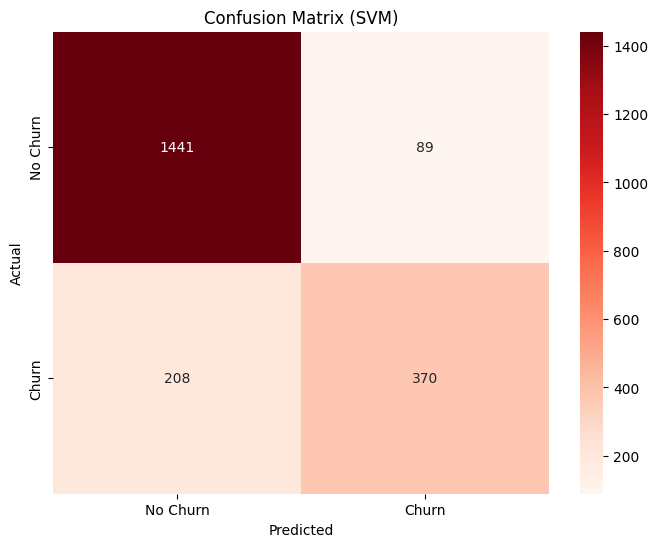

In [ ]:
from sklearn.svm import SVC  # Import SVC for SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ... (assuming cmap_pwc_orange is already defined)

# Define features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# 7. Model Evaluation

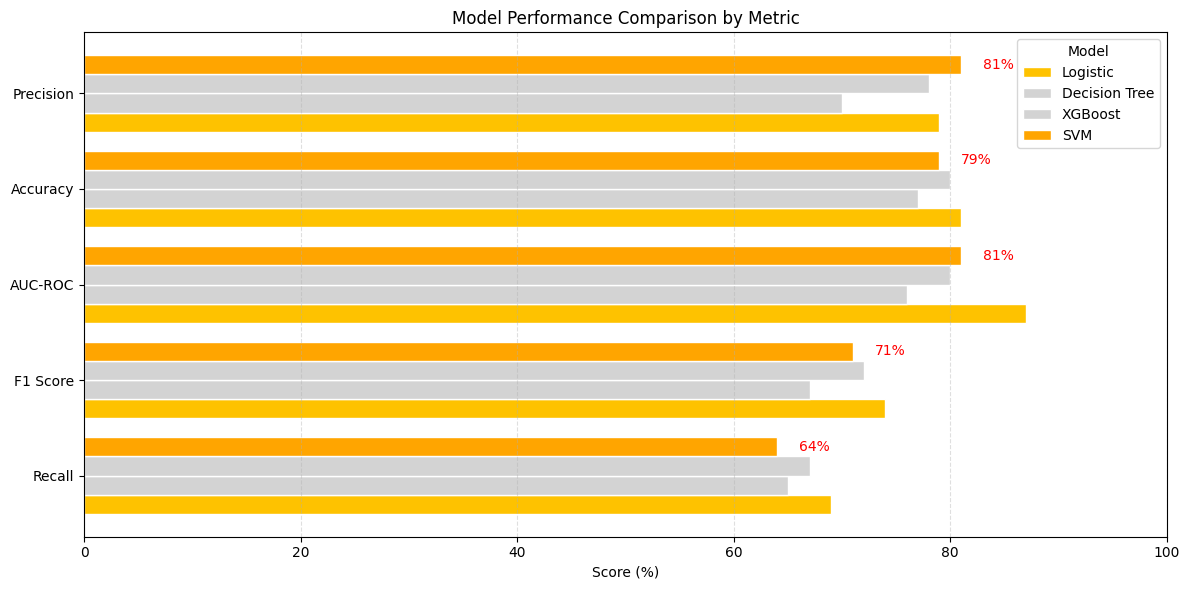

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['Logistic', 'Decision Tree', 'XGBoost', 'SVM']
metrics = [ 'Recall', 'F1 Score', 'AUC-ROC','Accuracy', 'Precision',]

# Metric values for each model (as percentages)
scores = [

    [69, 65, 67, 64],  # Recall
    [74, 67, 72, 71],  # F1 Score
    [87, 76, 80, 81],   # AUC-ROC
    [81, 77, 80, 79],  # Accuracy
    [79, 70, 78, 81]  # Precision
]

# Convert to numpy array
scores = np.array(scores)
bar_width = 0.2
y = np.arange(len(metrics))

# Define custom colors
colors = ['#fec200','lightgrey', 'lightgrey', 'orange']  # Updated colors

# Plot
plt.figure(figsize=(12, 6))
for i in range(len(models)):
    plt.barh(y + (i - 1.5) * bar_width, scores[:, i], height=bar_width,
             label=models[i], color=colors[i], edgecolor='white') # Add edgecolor
     # Add percentage labels for SVM (model index 3)
    if i == 3:  # SVM is at index 3 in the models list
        for j, v in enumerate(scores[:, i]):
            plt.text(v + 2, y[j] + (i - 1.5) * bar_width, str(v) + '%',
                     color='red', va='center')
# Formatting
plt.xlabel('Score (%)')  # Added percentage sign to x-axis label
plt.title('Model Performance Comparison by Metric')
plt.yticks(y, metrics)
plt.xlim(0, 100)  # Changed x-axis limits to 0-100 for percentages
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend(title="Model", loc='upper right')  # Moved legend to upper right
plt.tight_layout()
plt.show()

# 8. Insights and Recommendations